In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import lux
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")

C:\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df = pd.read_csv('covidvaccine.csv')
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 161251 entries, 0 to 161250
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         161247 non-null  object 
 1   user_location     128420 non-null  object 
 2   user_description  152109 non-null  object 
 3   user_created      161247 non-null  object 
 4   user_followers    161246 non-null  float64
 5   user_friends      161246 non-null  object 
 6   user_favourites   161246 non-null  object 
 7   user_verified     161246 non-null  object 
 8   date              161245 non-null  object 
 9   text              161251 non-null  object 
 10  hashtags          109731 non-null  object 
 11  source            161098 non-null  object 
 12  is_retweet        161241 non-null  object 
dtypes: float64(1), object(12)
memory usage: 16.0+ MB


In [5]:
# MISSING DATA
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))
missing_data(df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,4,32831,9142,4,5,5,5,5,6,5,51520,153,10
Percent,0.0024806,20.3602,5.66942,0.0024806,0.00310076,0.00310076,0.00310076,0.00310076,0.00372091,0.00310076,31.9502,0.0948831,0.00620151
Types,object,object,object,object,float64,object,object,object,object,object,object,object,object


In [6]:
# UNIQUE DATA
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))
unique_values(df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,161247,128420,152109,161247,161246,161246,161246,161246,161245,161246,109731,161098,161241
Uniques,80124,22893,79436,83191,17040,15777,47764,8,155874,161182,41870,244,1


In [7]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))
most_frequent_values(df)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

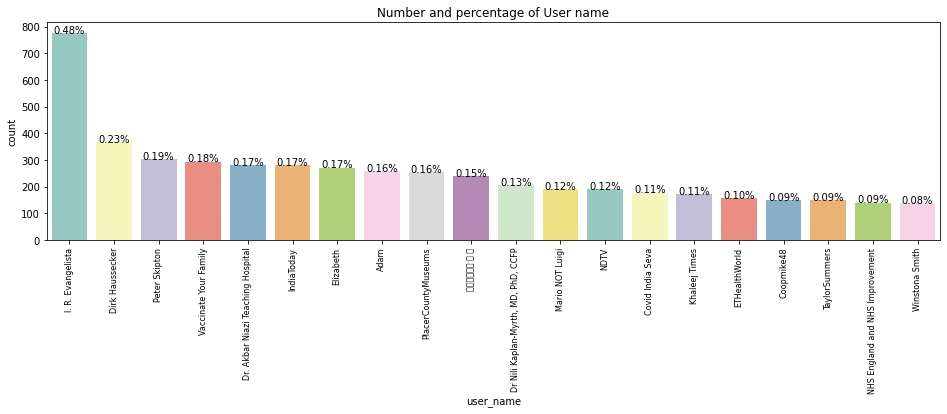

In [8]:
# visualize the distribution
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    
plot_count("user_name", "User name", df,4)

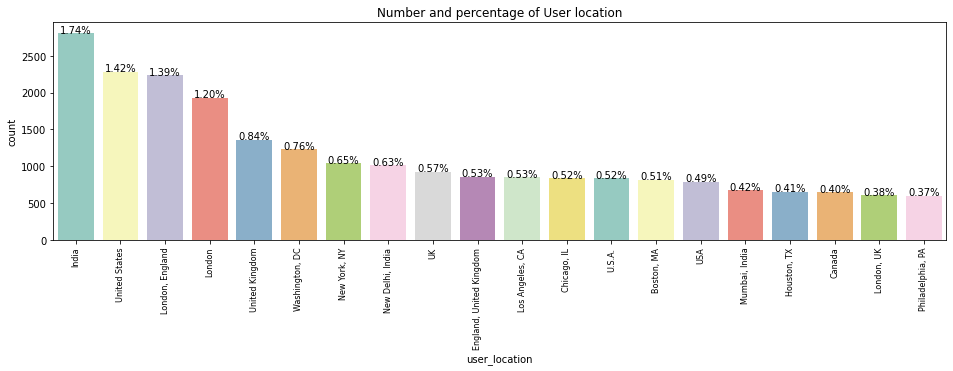

In [9]:
plot_count("user_location", "User location", df,4)

In [10]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [11]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

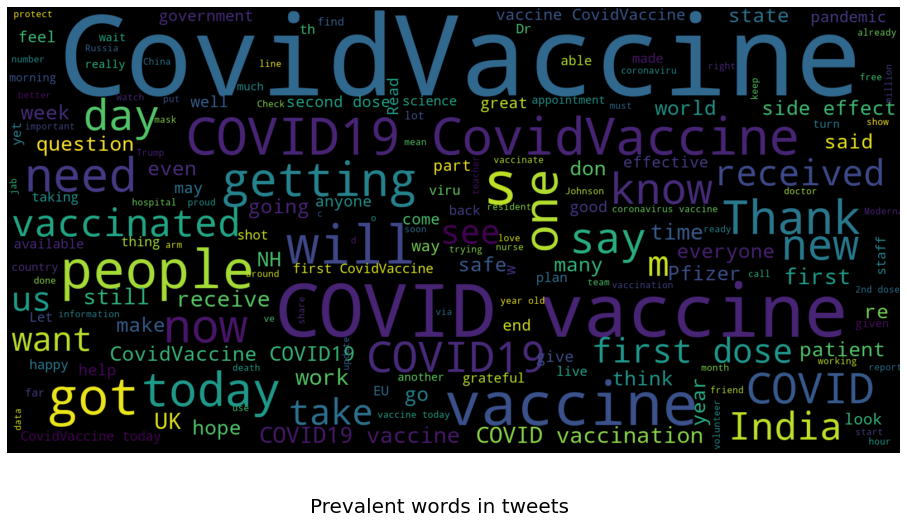

In [12]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

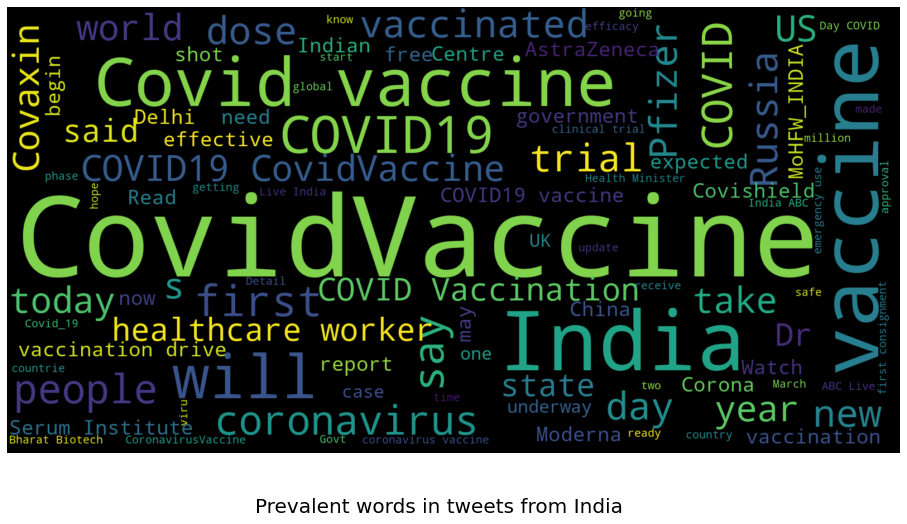

In [13]:
india_df = df.loc[df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

In [14]:
from transformers import pipeline
sentiment_analysis = pipeline('sentiment-analysis')

ValueError: Connection error, and we cannot find the requested files in the cached path. Please try again or make sure your Internet connection is on.

In [16]:
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

[nltk_data] Downloading package vader_lexicon to C:\Users\Himanshu
[nltk_data]     Beniwal\AppData\Roaming\nltk_data...


In [17]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

In [18]:
df['sentiment'] = df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'sentiment', 'Text')

AttributeError: 'float' object has no attribute 'encode'